In [1]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
ls gdrive/My\ Drive

'Colab Notebooks'/   dataset/   foo.txt   Keras/


In [0]:
import os
import numpy as np
import pandas as pd

import PIL 
from PIL import Image
import matplotlib.pyplot as plt

from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [46]:

np.random.seed(6524)

# train normal 1341 pneumonia 3875 total 5216
# test normal 234 pneumonia 390 total 624
# val normal 8 pneumonia 8 total 16 

img_size = 256 
channel = 1 

# 데이터셋 생성하기 
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'gdrive/My Drive/dataset/chest_xray/train',
        target_size=(img_size, img_size),    
        color_mode = 'grayscale',
        batch_size=64,
        class_mode='categorical')  

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        'gdrive/My Drive/dataset/chest_xray/val',
        target_size=(img_size, img_size),    
        color_mode = 'grayscale',
        batch_size=64,
        class_mode='categorical')




Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [47]:

test_imgs_list=[]
test_labels_list=[]
test_imgs=[]
test_labels=[]

def img_prep(img) : 
  img = img.resize((img_size,img_size)) 
  img = img.convert('L')
  return img 
  

for folder in ['NORMAL','PNEUMONIA']:
  for file in os.listdir('gdrive/My Drive/dataset/chest_xray/test/{}'.format(folder)):
    try:
      file_path = 'gdrive/My Drive/dataset/chest_xray/test/{}/{}'.format(folder,file)
      img = Image.open(file_path)
      img_p = img_prep(img)
    
      test_imgs_list.append(np.array(img_p))
       
      if folder =='NORMAL':
        label_onehot = np.array([1,0])

      elif folder =='PNEUMONIA':
        label_onehot = np.array([0,1])

      test_labels_list.append(np.array(label_onehot))
            
      test_imgs = np.array(test_imgs_list).reshape(len(test_imgs_list),img_size,img_size,channel)
      test_labels = np.array(test_labels_list).reshape(len(test_labels_list),2)
    except:
      pass

print('done')

done


In [48]:
# 모델 구성 
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 1)))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.summary()

adam = optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 5) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 256, 256, 16)      160       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        18496     
__________

Epoch 1/30
90/90 [==============================] - 75s 838ms/step - loss: 0.5495 - acc: 0.7465 - val_loss: 1.0021 - val_acc: 0.6250
Epoch 2/30
90/90 [==============================] - 73s 808ms/step - loss: 0.2414 - acc: 0.9010 - val_loss: 0.3888 - val_acc: 0.8125
Epoch 3/30
90/90 [==============================] - 72s 800ms/step - loss: 0.1519 - acc: 0.9368 - val_loss: 0.4891 - val_acc: 0.8125
Epoch 4/30
90/90 [==============================] - 73s 815ms/step - loss: 0.1067 - acc: 0.9592 - val_loss: 0.3200 - val_acc: 0.8125
Epoch 5/30
90/90 [==============================] - 73s 810ms/step - loss: 0.0956 - acc: 0.9658 - val_loss: 0.4128 - val_acc: 0.8125
Epoch 6/30
90/90 [==============================] - 73s 807ms/step - loss: 0.0797 - acc: 0.9698 - val_loss: 0.1521 - val_acc: 1.0000
Epoch 7/30
90/90 [==============================] - 73s 810ms/step - loss: 0.0860 - acc: 0.9677 - val_loss: 0.1487 - val_acc: 0.9375
Epoch 8/30
90/90 [==============================] - 72s 802ms/step - 

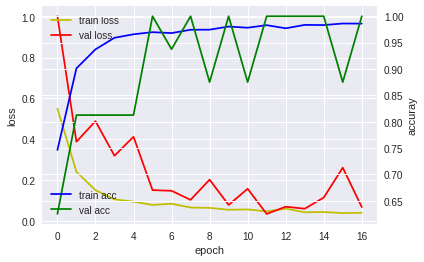

In [49]:
# 모델 학습
hist = model.fit_generator(
        train_generator,
        steps_per_epoch=90,  # train sample 5216, batch size 64
        epochs=30,
        validation_data=val_generator,
        validation_steps=1, # test sample 16, batch size 64
        callbacks=[early_stopping]
        )  


# 모델 학습 과정 표시하기 
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [50]:
# 모델 평가 및 사용하기
print("-- Evaluate --")
scores = model.evaluate(test_imgs, test_labels, batch_size=64)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


-- Evaluate --
624/624 [==============================] - 0s 660us/step
acc: 85.10%


In [51]:

print("-- Predict --")
output = model.predict(test_imgs)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(output)

-- Predict --
[[1.000 0.000]
 [1.000 0.000]
 [0.000 1.000]
 ...
 [0.000 1.000]
 [0.000 1.000]
 [0.000 1.000]]
